# Selecting and Fitting a Model

## Question 1

For each part, indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer. 

a.	The sample size n is extremely large, and the number of predictors p is small ?

Flexible methods would fare better. A flexible method will take advantage of the larger sample size (to calculate more parameters) and fit the data closer. The inflexible methods would not gain any discernible advantage, and may prescribe functional forms unsuited to the actual data generating process.  


b.	The number of predictors p is extremely large, and the number of observations n is small ?
Flexible methods would fare worse. They would most likely overfit the n data points, leading to poor performance on the test data

c. The relationship between the predictors and response is highly non-linear ?
Flexible methods would fare better. With more degrees of freedom, a flexible method would fit better than an inflexible one.

d.	The variance of the error terms, i.e. σ2=Var(ε)is extremely high ?
The flexible methods would fare worse. They would fit to the noise in the error terms and increase variance, thus only exacerbating the situation.

## Question 2 

### a. Generate a graph of typical (squared) bias, variance, training error, test error, and Bayes (irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

In [60]:
#First, the main module importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random

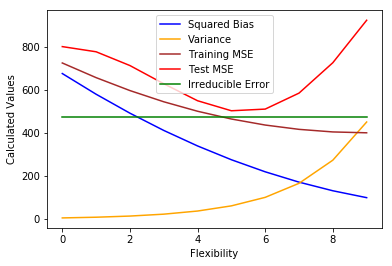

In [61]:
# Set the range of x
x = np.arange(0,10)

# Now we define Squared Bias, Variance, Training MSE, Test MSE and irreducible Bayes Error in that order
sq_bias = 50+ ((2*x - 25)**2)#This allows for a strongly decreasing function
var = np.exp(x/2)*5 #since it rises, some form of exponential function would be useful
MSE_train = 400+ ((2* x - 18)**2)  #This allows for a less strongly decreasing function than bias
MSE_test = 600+ (x**3/2 + 200 * np.cos(x/2))  #The trignometric function helps bring in the wave-like fall
e_bayes = 475 + x * 0 #This stays constant

#Plot all the curves
plt.plot(x, sq_bias, color="blue")
plt.plot(x, var, color="orange")
plt.plot(x, MSE_train, color="brown")
plt.plot(x, MSE_test, color="red")
plt.plot(x, e_bayes, color="green")

# Add label and legend
plt.xlabel('Flexibility')
plt.ylabel('Calculated Values')
plt.legend(['Squared Bias', 'Variance', 'Training MSE', 'Test MSE', 'Irreducible Error'])


### Explain why each of the five curves has the shape displayed in part (a)

### Individual Behaviour ((with respect to increasing flexibility)

1. Training Mean Square Error (MSE)
Behaviour: Decreases monotonically
Reason: The estimated curve fits the training data more and more closely

2. Test Mean Square Error (MSE)
Behaviour:U shape-Initially falls, levels off and then rises again
Reason: Initially, higher complexity (in more flexible models) may bring our estimated f close to the actual underlying relationship. However, beyond a point,we start overfitting the training data, and making the model less generalizable for test data. This brings down accuracy for fitting test data, and hence reduces the Test MSE 

3. Bias: 
Behaviour: Decreased Monotonically
Reason: Bias quantifies the error induced by attempting to model a problem in the real-world with a simpler model. More flexible models allow for introducing more model complexity that mirrors the actual data-generating mechanism. This reduces bias. 

4. Variance:
Behaviour: Increases Monotonically
Reason: Variance quantifies the amount by which our predicted function f would change as a result of changing the training data set. With flexible methods, f is likely to fit these new data closely for each new data set. Any of these points may again change f considerably, thus increasing the overall variance. 

5. Irreducible (Bayes) Error Variance:
Behaviour: Is a parallel line below the test MSE
Reason: The irreducible error is a constant regardless of model flexibility, and hence a parallel line. This line lies below the test MSE because the expected test will always be greater than the variance of the noise term as seen in the decomposition of the former term.(ISL, p34)



## Question 3

For classification problems, the test error rate is minimized by a simple classifier that assigns each observation to the most likely class given its predictor values:
Pr(Y=j|X=x0)Pr(Y=j|X=x0)
where x0x0 is the test observation and each possible class is represented by JJ. This is a conditional probability that Y=j, given the observed predictor vector x0. This classifier is known as the Bayes classifier. If the response variable is binary (i.e. two classes), the Bayes classifier corresponds to predicting class one if Pr(Y=1|X=x0)>0.5Pr(Y=1|X=x0)>0.5, and class two otherwise.
Figure 2.13 in [ISL] illustrates a simulated example defining the decision boundary for a hypothetical data set. Produce a graph illustrating this concept. Specifically, implement the following elements in your program:
a.	Set your random number generator seed.
b.	Simulate a dataset of N=200N=200 with X1,X2X1,X2 where X1,X2X1,X2 are random uniform variables between[−1,1].
c.	Calculate Y=X1+X21+X2+X22+ϵY=X1+X12+X2+X22+ϵ, where ϵ∼N(μ=0,σ2=0.25)ϵ∼N(μ=0,σ2=0.25).
d.	YY is defined in terms of the log-odds of success on the domain[−∞,+∞]. Calculate the probability of success bounded between [0,1].
e.	Plot each of the data points on a graph and use color to indicate if the observation was a success or a failure.
f.	Overlay the plot with Bayes decision boundary, calculated using X1,X2.
g.	Give your plot a meaningful title and axis labels.
h.	The colored background grid is optional.


In [62]:
#First, we generate data as per the stated conditions in parts a-c
np.random.seed(897)
n=200
e=np.random.normal(0,0.5, size=n)
x1=np.random.uniform(-1,1, size=n)
x2=np.random.uniform(-1,1, size=n)


In [63]:
#We are interested in the final classification of each data point on the basis of x1 and x2, and not necessarily all the intermediate steps
# Using the requirements in part d, and Eq 4.2 in ISL (2013, pp.132), we convert a new variable prob to help identify the class for y
# It would be wiser to use a function that handles this classification for us instead

def classify(x1, x2):
    mu, sigma = 0,0.5
    e = np.random.normal(mu, sigma, len(x1))
    y= x1**2+ x2**2 + x1+x2+e
    prob=np.divide(np.exp(y), 1+np.exp(y))
    success=prob>=0.5
    return success


In [64]:
#We now convert these three arrays in one data frame for smoother computation
df = pd.DataFrame(dict(x1=x1, x2=x2, color=classify(x1,x2)))


In [65]:
#We now create a mesh on which to plot the contours
step = 0.2
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
x_spread, y_spread = np.meshgrid(np.arange(x_min, x_max, step),np.arange(y_min, y_max, step))

In [66]:
bound = classify(x_spread.ravel(), y_spread.ravel())
bound = bound.reshape(x_spread.shape)

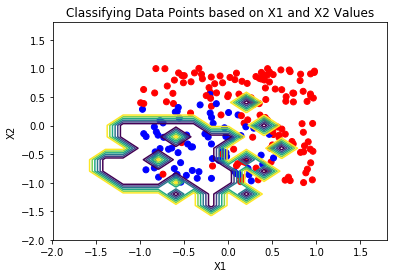

In [67]:
fig, ax = plt.subplots()
#We define a dictionary for classifying colours based on their value for the Boolean condition. 
colors = {True:'red', False:'blue'}
ax.scatter(df['x1'], df['x2'], c=df['color'].apply(lambda x: colors[x]))

plt.xlabel('X1')
plt.ylabel('X2')
plt.contour(x_spread, y_spread, bound)
plt.title('Classifying Data Points based on X1 and X2 Values')
plt.show()